In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.cluster import KMeans

In [9]:
df= pd.read_csv('bank_transactions.csv')

In [10]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207.0,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858.0,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712.0,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714.0,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156.0,1762.5


In [21]:
print(df.dtypes)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime            float64
TransactionAmount (INR)    float64
dtype: object


In [22]:
df = df.select_dtypes(exclude=['object'])


In [24]:
df = df.dropna()  


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [28]:
X

array([[-0.13469447, -0.80231944, -0.22673501],
       [-0.15458131, -0.83497901,  3.57546311],
       [-0.13462363, -0.81430349, -0.16774616],
       ...,
       [ 0.04741018, -0.26875065, -0.22197785],
       [-0.15706557, -0.12390097, -0.2287738 ],
       [-0.15699976, -0.11412005, -0.10902372]], shape=(15124, 3))

In [26]:
from sklearn.cluster import KMeans

inertias = []
for k in range(2, 11):
    kmean_model = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmean_model.inertia_)


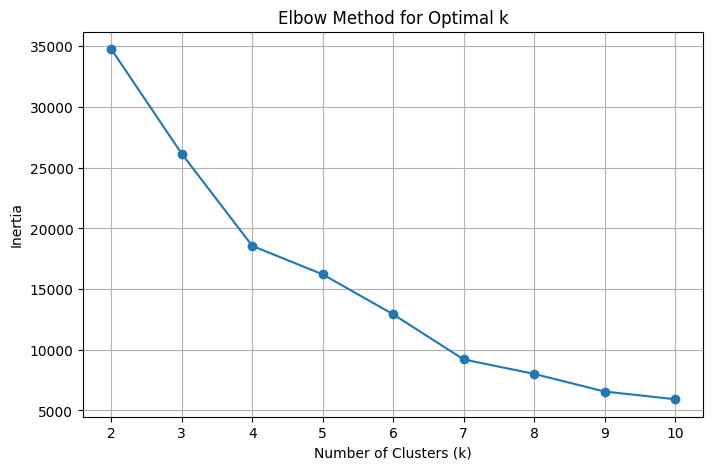

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()